<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 「Pythonによるデータ科学入門」のスライド中のコード (DAY 13)

Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0348 - val_loss: 0.0149
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0108 - val_loss: 0.0076
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0012 - val_loss: 7.7406e-04
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 7.3000e-04 - val_loss: 3.7275e-04
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 6.8405e-04 - val_loss: 2.3886e-04
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 6.2328e-04 - val_loss: 4.8542e-04
Epoch 8/10
2000/2000 [==============================] - 4s 2ms/step - loss: 5.4325e-04 - val_loss: 1.3005e-04
Epoch 9/10
2000/2000 [==============================] - 4s 2ms/step - loss: 4.2665e-04 - val_loss: 2.7955e-04
Epoch 10/10
2000/2000 [===============

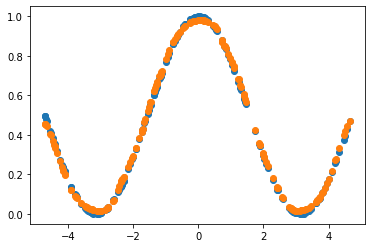

In [ ]:
# coding: utf-8
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

x_train=np.random.uniform(-np.pi*1.5,np.pi*1.5,2000)
y_train=(np.cos(x_train) + 1)/2

x_test=np.random.uniform(-np.pi*1.5,np.pi*1.5,200)
y_test=(np.cos(x_test) + 1)/2

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu', use_bias=True))
model.add(Dense(12, use_bias=True, activation='relu'))
model.add(Dense(12, use_bias=True, activation='relu'))
model.add(Dense(12, use_bias=True, activation='relu'))
model.add(Dense(1, use_bias=True, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='Adam')

model.fit(x_train,y_train,
          batch_size=1,epochs=10,
          verbose=1,validation_data=(x_test, y_test))

result = model.predict(x_test)

y_predict = result[:,0]

plt.scatter(x_test, y_test)
plt.scatter(x_test, y_predict)
plt.show()

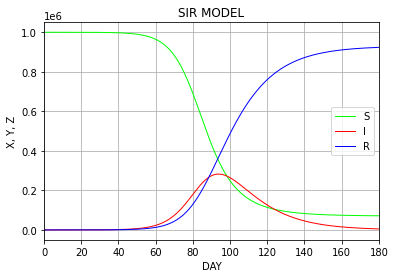

In [ ]:
# coding: utf-8
import math
import matplotlib.pyplot as plt

N = 1000000
x = N-10
y = 10
z = 0

taxis=[ ]
xaxis=[ ]
yaxis=[ ]
zaxis=[ ]

beta=0.2/N
gamma=0.07
dt=0.001

t = 0
cnt=0
while t<180:
    if cnt%100==0:
        taxis.append(t)
        xaxis.append(x)
        yaxis.append(y)
        zaxis.append(z)
    dxdt = - beta*x*y
    dydt = beta*x*y - gamma*y
    x = x + dxdt * dt
    y = y + dydt * dt
    z = N - x - y
    t = t + dt
    cnt = cnt + 1

plt.title("SIR MODEL")
plt.plot(taxis,xaxis, color=(0.0,1,0.0), linewidth=1.0, label='S')
plt.plot(taxis,yaxis, color=(1.0,0,0.0), linewidth=1.0, label='I')
plt.plot(taxis,zaxis, color=(0.0,0,1.0), linewidth=1.0, label='R')
plt.xlim(0,180)
plt.legend()
plt.xlabel('DAY')
plt.ylabel('X, Y, Z')
plt.grid(True)
plt.show()

In [ ]:
# coding: utf-8
import math
import numpy as np

samples=[3,2,4,2,2,1,4,2,10,4,3,4,4,3,3,9,9,3,4,3,9,4,5,9,7,7,3,7]
nsample=len(samples)

nb=1000
alphas=[]
betas=[]
P = np.ones((nsample,)).cumsum()/(nsample+1)
Y =np.log(- np.log(1-P))
for _ in range(nb):
    taus = np.sort( np.random.choice(samples,size=nsample,replace=True) )
    X = np.log(taus)
    a,b = np.polyfit(X,Y,1)
    alphas.append(a)
    betas.append(math.exp(-b/a))

alphas = np.array(alphas)
mua=alphas.mean()
s2=0
for i in range(nb):
    s2 += (alphas[i] - mua)**2
sea=math.sqrt(s2/(nb-1))
print('alpha:',mua,sea)

betas = np.array(betas)
mub=betas.mean()
s2=0
for i in range(nb):
    s2 += (betas[i] - mub)**2
seb=math.sqrt(s2/(nb-1))
print('beta:',mub,seb)


alpha: 1.9180061055925708 0.21180597128354334
beta: 5.352674449916394 0.5522641935432714


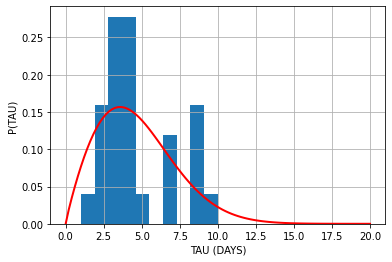

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def weibull(alpha,beta,tau):
    return alpha/(beta**alpha)*tau**(alpha-1)*np.exp(-(tau/beta)**alpha)

samples=[3,2,4,2,2,1,4,2,10,4,3,4,4,3,3,9,9,3,4,3,9,4,5,9,7,7,3,7]

alpha=1.9
beta=5.3

x = np.linspace(0,20,100)
y = weibull(alpha,beta,x)

plt.plot(x, y, color=(1.0,0.0,0.0), linewidth=2.0)
plt.hist(samples,density=True)
plt.xlabel('TAU (DAYS)')
plt.ylabel('P(TAU)')
plt.grid(True)
plt.show()


In [ ]:
# coding: utf-8
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime
import matplotlib.pyplot as plt

data = pd.read_csv("nhk_news_covid19_prefectures_daily_data.csv")
prefs = {
    1:'HOKKAIDO', 2:'AOMORI', 3:'IWATE', 4:'MIYAGI', 5:'AKITA',
    6:'YAMAGATA', 7:'FUKUSHIMA', 8:'IBARAKI', 9:'TOCHIGI', 10:'GUNMA',
    11:'SAITAMA', 12:'CHIBA', 13:'TOKYO', 14:'KANAGAWA', 15:'NIIGATA',
    16:'TOYAMA', 17:'ISHIKAWA', 18:'FUKUI', 19:'YAMANASHI', 20:'NAGANO',
    21:'GIFU', 22:'SHIZUOKA', 23:'AICHI', 24:'MIE', 25:'SHIGA',
    26:'KYOTO', 27:'OSAKA', 28:'HYOGO', 29:'NARA', 30:'WAKAYAMA',
    31:'TOTTORI', 32:'SHIMANE', 33:'OKAYAMA', 34:'HIROSHIMA', 35:'YAMAGUCHI',
    36:'TOKUSHIMA', 37:'KAGAWA', 38:'EHIME', 39:'KOCHI', 40:'FUKUOKA',
    41:'SAGA', 42:'NAGASAKI', 43:'KUMAMOTO', 44:'OITA', 45:'MIYAZAKI',
    46:'KAGOSHIMA', 47:'OKINAWA'}

ndays=700
X = np.zeros(shape=(ndays,48))
DAYS = np.linspace(0,ndays-1,ndays)

for n,cols in data.iterrows():
    days = (pd.to_datetime(cols['日付']) - pd.to_datetime('2020/01/01')).days
    pref_code =  cols['都道府県コード']
    pref_name =  cols['都道府県名']
    n_positive = cols['各地の感染者数_1日ごとの発表数']
    n_deathtoll = cols['各地の死者数_1日ごとの発表数']
    if days>=0 and days<X.shape[0]: 
        X[days,pref_code] = n_positive

for i in range(1,48):
    plt.plot(DAYS,X[:,i],'-',label=prefs[i])

# plt.legend()
plt.ylabel('NUMBER OF TEST-POSITIVE CASES')
plt.xlabel('DAYS from 2020/01/01')
plt.show()